## Constructing an energy matrix using Linear regression and MCMC 

The code in this tutorial is released under the [MIT License](https://opensource.org/licenses/MIT). All the content in this notebook is under a [CC-by 4.0 License](https://creativecommons.org/licenses/by/4.0/). 

In [3]:
import pandas as pd

import regseq.information
import regseq.inference
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regseq.find_region as find_region

# Activate a setting that causes all plots to be inside the notebook rather than in pop-ups.
%matplotlib inline
# Get svg graphics from the notebook
%config InlineBackend.figure_format = 'svg' 

For a detailed explanation of the steps leading to this notebook, as well as the experimental context, refer to the [Reg-Seq wiki](https://github.com/RPGroup-PBoC/RegSeq/wiki).

During the Reg-Seq experiment, we measured the frequencies of mutant promoters in the libraries via sequencing, which we label as 'ct_0'. We also measure the number mRNA counts produced by each mutant promoter via sequencing, which we label 'ct_1'. In the previous step we used various methods of statistical inference to estimate how a mutation at a certain base changes the expression of that gene. The first simple least square method returned expression change per locus independent of the mutated base. The following file is the result of that inference, which can be found in `4_2_inference.ipynb`.

In [4]:
emat = np.loadtxt("../data/inference_results/ykgE_LS_mut_inf.txt")

We can now plot the results. We will see the effect of mutations on expression.

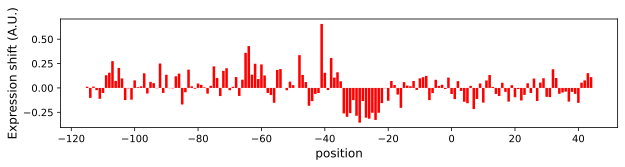

In [5]:
fig,ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Expression shift (A.U.)',fontname='DejaVu Sans',fontsize=12)
ax.set_xlabel('position',fontname='DejaVu Sans',fontsize=12)
plt.bar(np.arange(-115, 45),emat,color='r')
plt.show()

This plot shows how expression is changed if a base is mutated.

The expression shift can be converted into an information footprint. For details on the conversion, check out **INSERT HTML FILE HERE**. The conversion script returns the information footprint smoothed with a window size = 3
(the values are averaged with their neighbors), and coloring each base showing whether mutation tends to increase gene expression (repressor like, blue) or
decrease gene expression (activator like, red). Therefore use the fuction `regseq.viz.footprint`, which takes the path to the inference results as input. Also we need to give the gene of interest as input. The function accesses the file we generated prior to the experiments, which contains the information about the transcription start site and the direction of transcription. Below you can see the docstring of this function, explaining the arguments.

In [5]:
?regseq.viz.footprint

Signature:
regseq.viz.footprint(
    matrix,
    output_file=None,
    wildtype_file='../data/prior_designs/wtsequences.csv',
    gene=None,
    show_real_pos=False,
    windowsize=3,
)
Docstring:
Plot information footprint.

Footprint is smoothed with a window of size windowsize. Bars are colored by
increased or decreased expression.

Parameters
----------
matrix : str
    File path for energy matrix
output_file : 
    File path to store plot
wildtype_file : str, default None
    Path to file containing information about gene TSS and direction of transcription
gene : str, default None
    Gene name in to find TSS and direction of transcription in gene file.
show_real_pos : boolean, default False
    If True, positions will be given as in the genome. If False, positions are shown
    relative to TSS.
windowsize: Int, default 3
    Size of sliding window used to average mutual information

Returns
-------
ax : matplotlib.pyplot object
    Information Footprint
File:      ~/git/RegSeq/re

Let's use the function to plot the information footprint for the file we loaded in above, which contains inference results from a simple least square method.

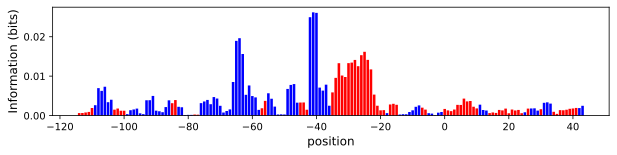

In [6]:
p = regseq.viz.footprint("../data/inference_results/ykgE_LS_mut_inf.txt", gene="ykgE")

We also performed a least square inference using the `mpathic` package, returning an energy matrix, which gives more information on how each mutated base changes the expression. We stored the results from this inference in the following file.

In [7]:
file = "../data/inference_results/ykgE_LS_mut.csv"

Let's create the same plot as above, looking at the change in expression at each base in the sequence. Therefore we have to transform the energy matrix into an array which gives the change of expression at each base for a mutation. To compute this array, we can use the function `regseq.information.emat_to_information`, which simply takes the path of file containing the energy matrix as input.

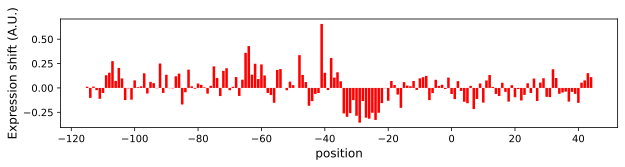

In [8]:
q = regseq.information.emat_to_information(file)
fig,ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Expression shift (A.U.)',fontname='DejaVu Sans',fontsize=12)
ax.set_xlabel('position',fontname='DejaVu Sans',fontsize=12)
plt.bar(range(-115,45), emat, color='r')
plt.show()

Again, we can compute an information footprint. This time we use the function `regseq.viz.footprint_from_emat`, which computes an information footprint from an energy matrix.

<module 'matplotlib.pyplot' from '/Users/tomroschinger/opt/anaconda3/envs/mpathic_env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

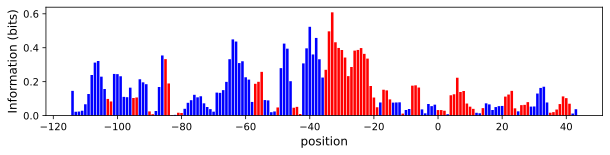

In [9]:
regseq.viz.footprint_from_emat(file, output_file=None, gene="ykgE")

Finally, we also used an MCMC inference method to obtain energy matrices. In the example in the `4_2_inference.ipynb` notebook, we only did a few iterations for the sake of computation time. Let's have a look at the results from the inference.

<module 'matplotlib.pyplot' from '/Users/tomroschinger/opt/anaconda3/envs/mpathic_env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

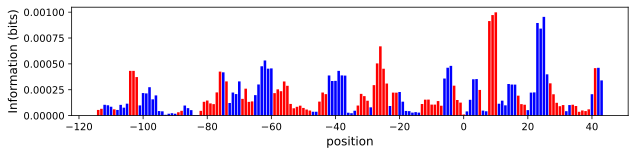

In [10]:
regseq.viz.footprint_from_emat("../data/inference_results/ykgE_MCMC_mut.csv", output_file=None, gene="ykgE")

We can barely identify the any significany sites from this inference. Here we can see that it is important to use plenty of steps in the MCMC algorithm to retrieve accurate results. In general, you want to use the MCMC algorithm for the analysis as much as possible, and use plenty if warmup and sampling steps, to ensure the convergence of the inference. 

Below we show how the results of an inference with many steps look like. The file containing the results can be found in `data/results/MCMC/bdcRAnaerodataset_alldone_with_largeMCMC194`. Note that in order to use this file, we have to give two extra arguments to the plotting function to use the format of the files that was used in this analysis, and has been changed since. Therefore you need to give the argument `old_format=True`, and give the gene name as string. 

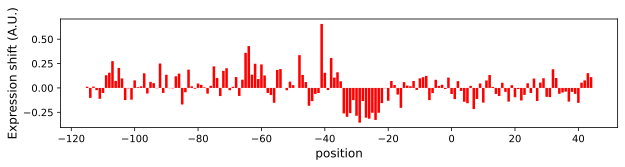

In [15]:
file = "../data/inference_results/ykgEarabinosedataset_alldone_with_largeMCMC194"

q = regseq.information.emat_to_information(file, old_format=True, gene="ykgE" )
fig,ax = plt.subplots(figsize=(10,2))
ax.set_ylabel('Expression shift (A.U.)',fontname='DejaVu Sans',fontsize=12)
ax.set_xlabel('position',fontname='DejaVu Sans',fontsize=12)
plt.bar(range(-115,45), emat, color='r')
plt.savefig("../wiki_img/expression_change.PNG", format="PNG", dpi=150)
plt.show()


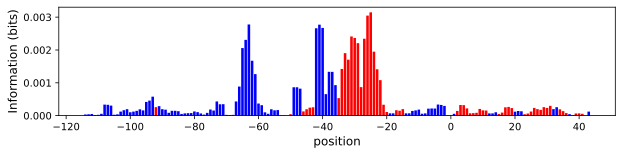

In [16]:
p = regseq.viz.footprint_from_emat("../data/inference_results/ykgEarabinosedataset_alldone_with_largeMCMC194", output_file=None, old_format=True, gene="ykgE")

It is possible to display the real positions in the genome, which can be done by setting the argument `show_real_pos` to `True`.

<module 'matplotlib.pyplot' from '/Users/tomroschinger/opt/anaconda3/envs/mpathic_env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

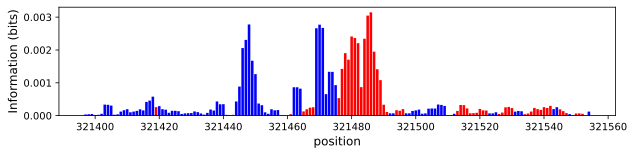

In [17]:
regseq.viz.footprint_from_emat(
    "../data/inference_results/ykgEarabinosedataset_alldone_with_largeMCMC194", 
    output_file=None, 
    old_format=True, 
    gene="ykgE",
    show_real_pos=True,
    windowsize=3
)

Now we can cleary identify significant binding sites, and obtain information if the binding site is for an activator or a repressor. The next step is to look at sequence logos at the significant sites, using these information footprints to identify signifcant sites. 

Finally, here are the versions of packages used in this notebook. To display the versions, we are using the Jupyter Lab extension `watermark`, which can be found [here](https://github.com/rasbt/watermark).

## Computing Environment

In [18]:
%load_ext watermark
%watermark -v -p jupyterlab,numpy,pandas,sklearn,scipy,regseq,seaborn,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.9
IPython 7.16.1

jupyterlab not installed
numpy 1.19.2
pandas 1.1.5
sklearn 0.24.2
scipy 1.5.2
regseq 0.0.4
seaborn 0.11.2
matplotlib 3.3.4
